# Notebook for constructing the GLIDE Matrix

## Generating a sample network

In [11]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys

# Install the networkx package for handy visualization of the network
#!pip install networkx

import networkx as nx
from scipy.spatial.distance import pdist, squareform

A  = np.random.rand(10, 10) 
A /= np.max(A)
A = A + A.T
np.fill_diagonal(A, 0)
A = np.where(A < 0.6, 0, A)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Visualize this network

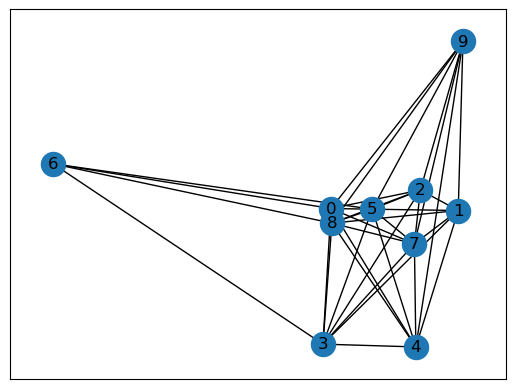

In [12]:
import matplotlib.pyplot as plt

G = nx.from_numpy_matrix(A)
pos = nx.spectral_layout(G)
nx.draw_networkx(G, pos = pos)
plt.show()

## Compute the GLIDE matrix

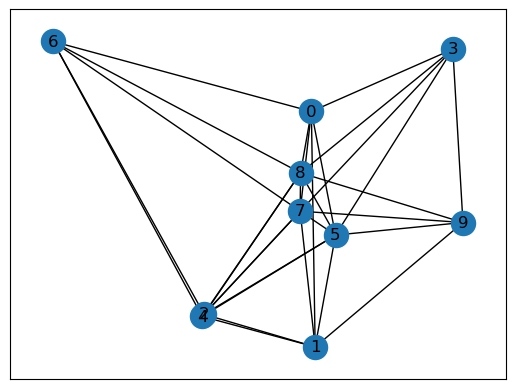

,0,1,2,3,4
0,8,5,7,1,3
1,7,5,0,2,4
2,4,7,5,8,1
3,8,5,7,0,9
4,7,2,5,8,1
5,8,7,0,2,3
6,2,4,7,8,0
7,5,4,8,2,1
8,5,0,3,7,2
9,7,5,3,1,8


In [19]:
import sys
from glidetools.construct_graph import  get_glide_neighbors
# G  = glide(A, local = "l3", normalize_dsd=False, normalize = True, weighted = False)  
G  = get_glide_neighbors(A, local="cw", k = 5, output_type = "graph", normalize = True, normalize_dsd = True)
G1  = get_glide_neighbors(A, local="cw", k = 5, output_type = "dataframe", normalize = True, normalize_dsd = True)
try:
    pos = nx.spectral_layout(G)
    nx.draw_networkx(G, pos = pos)
    plt.show()
except e:
    print("")
G1

In [1]:
import glidetools.algorithm.dsd

In [17]:
!cd ../gtools/; pip install .;

Processing /media/G/code/GLIDER/gtools
  Preparing metadata (setup.py) ... done
  Created wheel for glidetools: filename=glidetools-0.0.1-py3-none-any.whl size=14051 sha256=811d02f80c0ccc5ddca4bd96d6fe39bcfe9a5d62417bf8e8d60000d1466fbe91
  Stored in directory: /tmp/pip-ephem-wheel-cache-hgqkd41c/wheels/55/01/a6/25d3097c16ff426e22e351bef12214a237292ffb6a22f92397
Successfully built glidetools
  Attempting uninstall: glidetools
    Found existing installation: glidetools 0.0.1
    Uninstalling glidetools-0.0.1:
      Successfully uninstalled glidetools-0.0.1
